In [1]:
import pandas as pd
import supy as sp
import matplotlib.pyplot as plt
from functions.night import *
from functions.dict_legend import *
in_folder = '../data/'
sp.show_version()

c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


SuPy version: 2023.7.3.dev0
-------------


In [2]:
def merge_output(scenario_list, suffix_list):

    df_output_merge_x=df_output_merge_x=pd.concat(scenario_list,axis=1,join='inner', keys = suffix_list).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1).loc[grid]
    df_merge_x=df_output_merge_x.SUEWS

    # add available energy, AE
    df_merge_x=df_merge_x.stack().eval('AE=QN+QF-QS').unstack()

    return df_merge_



In [3]:
s_rc = in_folder + 'sample_data/RunControl.nml'         # Sampledata Q* modelled with L↓ modelled using air temperature and relative humidity supplied in meteorological forcing file [Loridan et al., 2011]. Zenith angle not accounted for in albedo calculation.d
s2_rc = in_folder + 'sample_data2/RunControl.nml'       # Sampledata Spartacus, standard values in GridLayout
s3_rc = in_folder + 'sample_data3/RunControl.nml'       # Sampledata Spartacus Thicker first layer wall all three layers. 1.2 instad of .2
s3x_rc = in_folder + 'sample_data3x/RunControl.nml'     # Sampledata Spartacus Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
s4_rc = in_folder + 'sample_data4/RunControl.nml'       # Sampledata Spartacus wall albedo lowered .25 instad of .5
s5_rc = in_folder + 'sample_data5/RunControl.nml'       # Sampledata Spartacus wall emissivity lower .9 instead of .95
s6_rc = in_folder + 'sample_data6/RunControl.nml'       # Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2

df_state_init_s = sp.init_supy(s_rc)
df_state_init_s2 = sp.init_supy(s2_rc)
df_state_init_s3 = sp.init_supy(s3_rc)
df_state_init_s3x = sp.init_supy(s3x_rc)
df_state_init_s4 = sp.init_supy(s4_rc)
df_state_init_s5 = sp.init_supy(s5_rc)
df_state_init_s6 = sp.init_supy(s6_rc)

2023-11-02 10:56:37,861 - SuPy - INFO - All cache cleared.
2023-11-02 10:56:40,087 - SuPy - INFO - All cache cleared.
2023-11-02 10:56:42,034 - SuPy - INFO - All cache cleared.
2023-11-02 10:56:43,883 - SuPy - INFO - All cache cleared.
2023-11-02 10:56:45,694 - SuPy - INFO - All cache cleared.
2023-11-02 10:56:47,790 - SuPy - INFO - All cache cleared.
2023-11-02 10:56:49,793 - SuPy - INFO - All cache cleared.


In [4]:
df_state_init_s2.loc[:, 'dz_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01


In [5]:
df_state_init_s3x.loc[:, 'dz_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,1.2,1.1,0.1,0.01,0.01,1.2,1.1,0.1,0.01,0.01,1.2,1.1,0.1,0.01,0.01


In [4]:
# Metdata 
grid = df_state_init_s.index[0]
df_forcing = sp.load_forcing_grid(s_rc, grid)

s = '2012 07 01'
e = '2012 07 27'

# # warm week 2012  to reduce time for test setup
df_forcing=df_forcing.loc[s: e].iloc[1:]


2023-11-02 10:56:51,741 - SuPy - INFO - All cache cleared.


In [5]:
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)

2023-11-02 10:57:10,409 - SuPy - INFO - ====================
2023-11-02 10:57:10,410 - SuPy - INFO - Simulation period:
2023-11-02 10:57:10,412 - SuPy - INFO -   Start: 2012-07-01 00:05:00
2023-11-02 10:57:10,413 - SuPy - INFO -   End: 2012-07-27 23:55:00
2023-11-02 10:57:10,415 - SuPy - INFO - 
2023-11-02 10:57:10,416 - SuPy - INFO - No. of grids: 1
2023-11-02 10:57:10,417 - SuPy - INFO - SuPy is running in serial mode


<Axes: xlabel='datetime'>

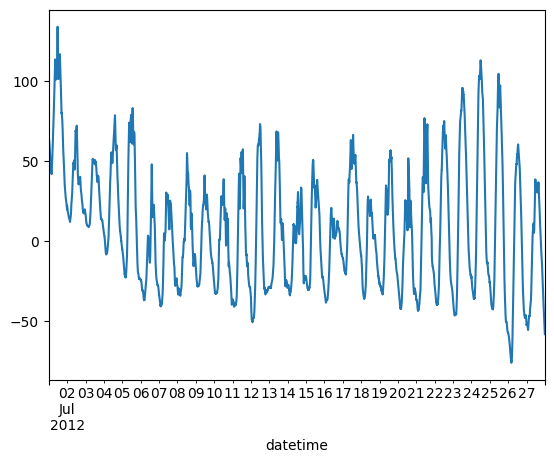

In [11]:

s = '2012 07 22'
e = '2012 07 27'

df_output_s2.SUEWS.loc[grid].loc[:,'QS'].plot()

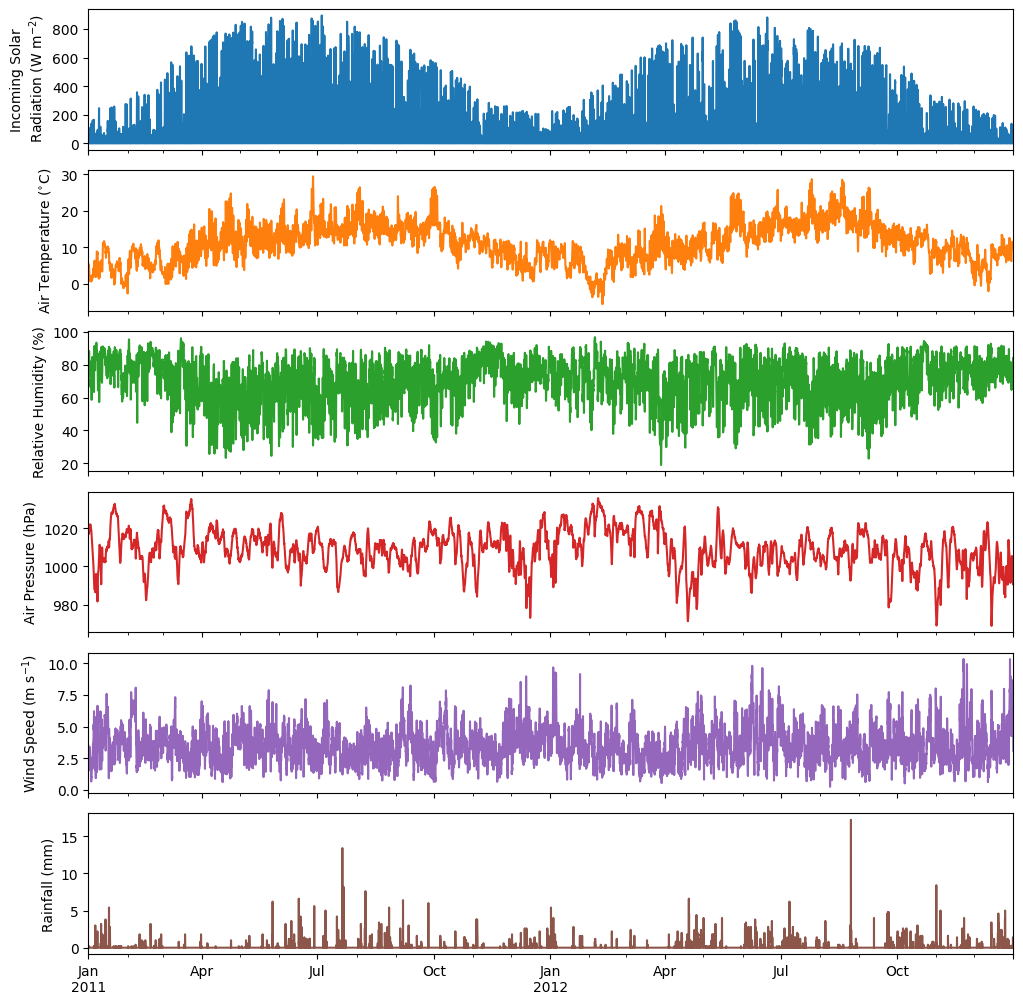

In [5]:


df_plot_forcing_x = df_forcing.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])



# Run

In [6]:
df_output_s, df_state_final_s = sp.run_supy(df_forcing, df_state_init_s)
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)
df_output_s3, df_state_final_s3 = sp.run_supy(df_forcing, df_state_init_s3)
df_output_s3x, df_state_final_s3x = sp.run_supy(df_forcing, df_state_init_s3x)
df_output_s4, df_state_final_s4 = sp.run_supy(df_forcing, df_state_init_s4)
df_output_s5, df_state_final_s5 = sp.run_supy(df_forcing, df_state_init_s5)
df_output_s6, df_state_final_s6 = sp.run_supy(df_forcing, df_state_init_s6)

2023-08-29 15:58:43,147 - SuPy - INFO - ====================
2023-08-29 15:58:43,148 - SuPy - INFO - Simulation period:
2023-08-29 15:58:43,149 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2023-08-29 15:58:43,150 - SuPy - INFO -   End: 2013-01-01 00:00:00
2023-08-29 15:58:43,150 - SuPy - INFO - 
2023-08-29 15:58:43,151 - SuPy - INFO - No. of grids: 1
2023-08-29 15:58:43,152 - SuPy - INFO - SuPy is running in serial mode
2023-08-29 16:00:42,815 - SuPy - INFO - Execution time: 119.7 s
2023-08-29 16:00:42,816 - SuPy - INFO - ====================

2023-08-29 16:00:42,818 - SuPy - INFO - ====================
2023-08-29 16:00:42,819 - SuPy - INFO - Simulation period:
2023-08-29 16:00:42,821 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2023-08-29 16:00:42,822 - SuPy - INFO -   End: 2013-01-01 00:00:00
2023-08-29 16:00:42,823 - SuPy - INFO - 
2023-08-29 16:00:42,825 - SuPy - INFO - No. of grids: 1
2023-08-29 16:00:42,826 - SuPy - INFO - SuPy is running in serial mode
2023-08-29 18:22:03,158 - 

In [21]:
# df_merge = merge_output([df_output_s,df_output_s2, df_output_s3, df_output_s3x,df_output_s4, df_output_s5, df_output_s6, ], ['sample_data', 'Spartacus_2', 'Spartacus_3', 'Spartacus_3x','Spartacus_4', 'Spartacus_5','Spartacus_6', ])

df_merge = merge_output([df_output_s2, df_output_s3, df_output_s3x,df_output_s4, df_output_s5, df_output_s6, ], ['Spartacus_2', 'Spartacus_3', 'Spartacus_3x','Spartacus_4', 'Spartacus_5','Spartacus_6', ])

# Plot

In [54]:
# Start and end date for inspection
s = '2012-07-21'
e = '2012-07-30'

In [91]:
df_merge = df_merge.stack().eval('BowenRatio=QH/QE').unstack()
df_merge = df_merge.stack().eval('QS_f=QS/(QN+QF)').unstack()
df_merge = df_merge.stack().eval('QH_f=QH/(QN+QF)').unstack()
df_merge = df_merge.stack().eval('QE_f=QE/(QN+QF)').unstack()



var                          QS                                       \
                    Spartacus_2 Spartacus_3 Spartacus_3x Spartacus_4   
datetime                                                               
2012-07-24 11:00:00  105.341895   86.873718    90.097319  107.193038   
2012-07-24 11:05:00  106.611010   87.882295    91.849819  108.804634   
2012-07-24 11:10:00  107.863632   88.739796    92.898563  110.085241   
2012-07-24 11:15:00  109.133234   89.899773    93.736689  111.367077   
2012-07-24 11:20:00  110.134348   90.925189    94.775016  112.391579   
2012-07-24 11:25:00  111.399016   91.936283    95.824158  113.677542   
2012-07-24 11:30:00  112.969915   92.956121    96.876310  114.981631   

var                                          
                    Spartacus_5 Spartacus_6  
datetime                                     
2012-07-24 11:00:00  104.969846   99.194926  
2012-07-24 11:05:00  106.614585  100.431810  
2012-07-24 11:10:00  107.604907  101.874638  
2012-07-24 11:15:00  109.144401  102.817415  
2012-07-24 11:20:00  110.419626  104.268139  
2012-07-24 11:25:00  111.711741  105.204080  
2012-07-24 11:30:00  112.706061  106.654462

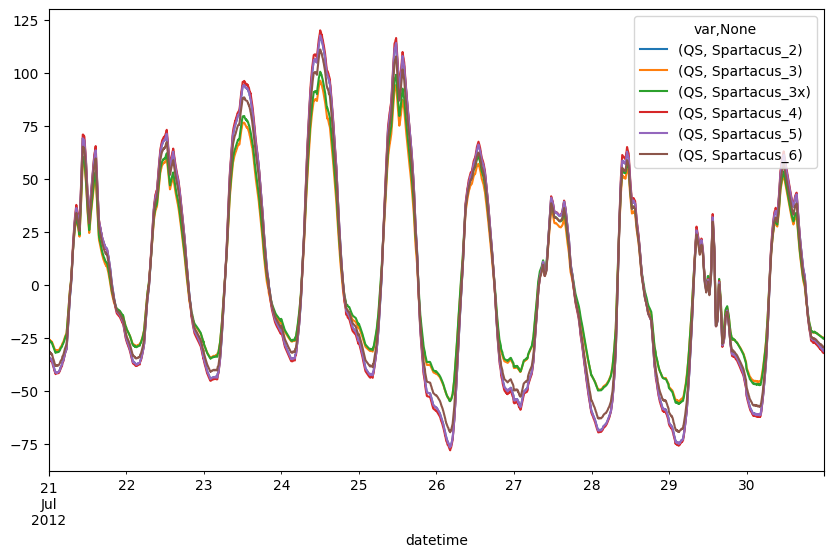

In [34]:
var = 'QS'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
df_merge.loc['2012-07-24 11:00': '2012-07-24 11:30',[var]]

# Spartacus_2           Sampledata Spartacus, standard values in GridLayout
# Spartacus_3           Sampledata Spartacus Thicker first layer wall all three layers. 1.2 instad of .2
# Spartacus_3x          Sampledata Spartacus Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
# Spartacus_4           Sampledata Spartacus wall albedo lowered .25 instad of .5
# Spartacus_5           Sampledata Spartacus wall emissivity lower .9 instead of .95
# Spartacus_6           Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2

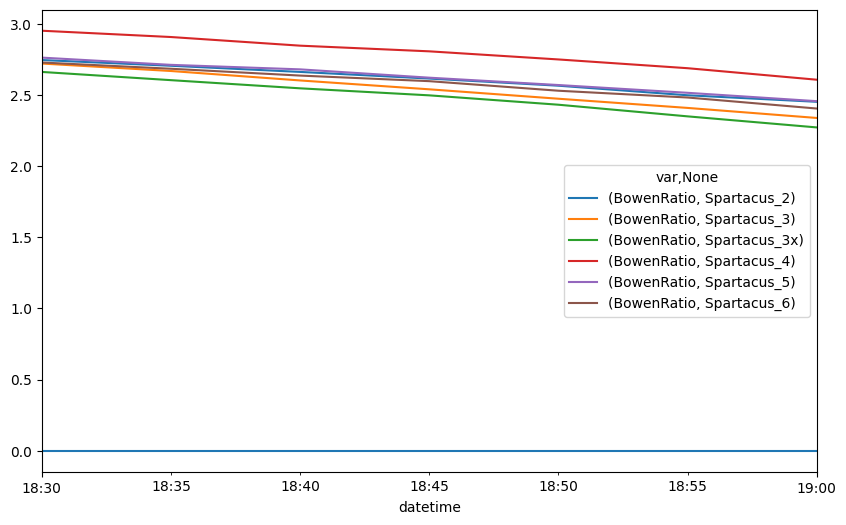

In [92]:
var = 'BowenRatio'

# s = '2012-07-28 15:00'
# e = '2012-07-28 17:00'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6))
# df_merge.loc[s:e,[var]]

ax.axhline(0,0)

var                  BowenRatio                                       \
                    Spartacus_2 Spartacus_3 Spartacus_3x Spartacus_4   
datetime                                                               
2012-07-26 00:00:00    2.167726    1.567134     1.531904    2.227412   
2012-07-26 00:05:00    2.172058    1.561997     1.529866    2.236260   
2012-07-26 00:10:00    2.178520    1.559277     1.526919    2.240352   
2012-07-26 00:15:00    2.185490    1.556952     1.526415    2.251297   
2012-07-26 00:20:00    2.192663    1.554675     1.524426    2.255464   
...                         ...         ...          ...         ...   
2012-07-30 23:35:00    1.786019    1.505604     1.512932    1.846858   
2012-07-30 23:40:00    1.789118    1.502728     1.516943    1.897872   
2012-07-30 23:45:00    1.844169    1.500141     1.514695    1.860750   
2012-07-30 23:50:00    1.805587    1.492785     1.512769    1.858421   
2012-07-30 23:55:00    1.870338    1.519719     1.534493    1.922533   

var                                          
                    Spartacus_5 Spartacus_6  
datetime                                     
2012-07-26 00:00:00    2.189223    1.956289  
2012-07-26 00:05:00    2.193684    1.958157  
2012-07-26 00:10:00    2.200283    1.961990  
2012-07-26 00:15:00    2.207392    1.966282  
2012-07-26 00:20:00    2.214707    1.970739  
...                         ...         ...  
2012-07-30 23:35:00    1.820048    1.709694  
2012-07-30 23:40:00    1.818102    1.706964  
2012-07-30 23:45:00    1.819487    1.706784  
2012-07-30 23:50:00    1.873709    1.707723  
2012-07-30 23:55:00    1.905384    1.773831  

[1440 rows x 6 columns]

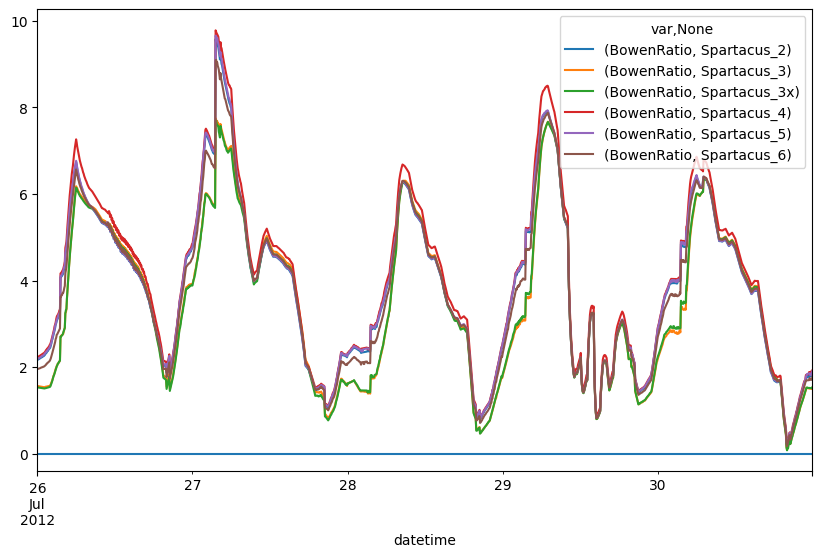

In [96]:
var = 'BowenRatio'
s = '2012-07-26'
e = '2012-07-30'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6))
ax.axhline(0,0)

df_merge.loc[s:e,[var]]


var                  BowenRatio                                       \
                    Spartacus_2 Spartacus_3 Spartacus_3x Spartacus_4   
datetime                                                               
2012-07-26 18:30:00    2.745094    2.720468     2.661427    2.950976   
2012-07-26 18:35:00    2.704784    2.667994     2.603641    2.906735   
2012-07-26 18:40:00    2.661522    2.601595     2.546295    2.845991   
2012-07-26 18:45:00    2.614850    2.539320     2.496905    2.806179   
2012-07-26 18:50:00    2.564731    2.473130     2.431082    2.749154   
2012-07-26 18:55:00    2.497460    2.408579     2.349265    2.687637   
2012-07-26 19:00:00    2.451603    2.338056     2.271585    2.606817   

var                                          
                    Spartacus_5 Spartacus_6  
datetime                                     
2012-07-26 18:30:00    2.762040    2.727692  
2012-07-26 18:35:00    2.711224    2.683828  
2012-07-26 18:40:00    2.679512    2.635828  
2012-07-26 18:45:00    2.621065    2.596596  
2012-07-26 18:50:00    2.569437    2.529364  
2012-07-26 18:55:00    2.514808    2.481713  
2012-07-26 19:00:00    2.455997    2.404303

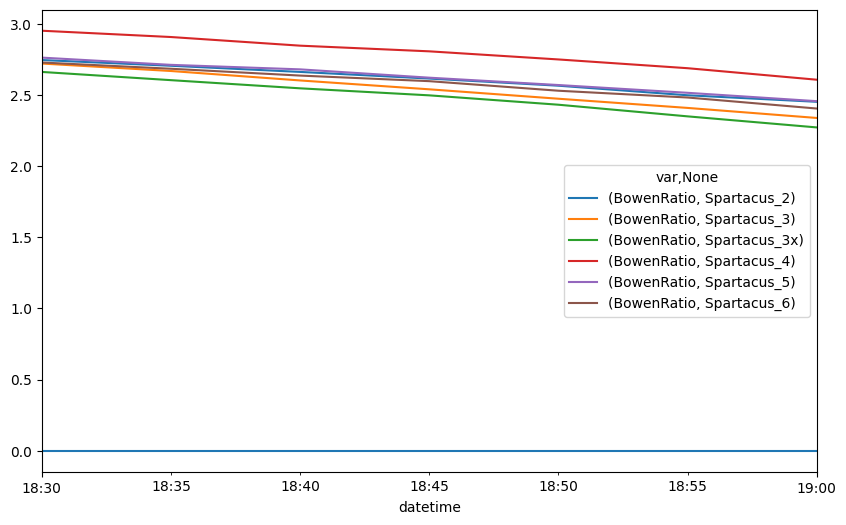

In [86]:
var = 'BowenRatio'

s = '2012-07-26 18:30'
e = '2012-07-26 19:00'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6))
ax.axhline(0,0)

df_merge.loc[s:e,[var]]

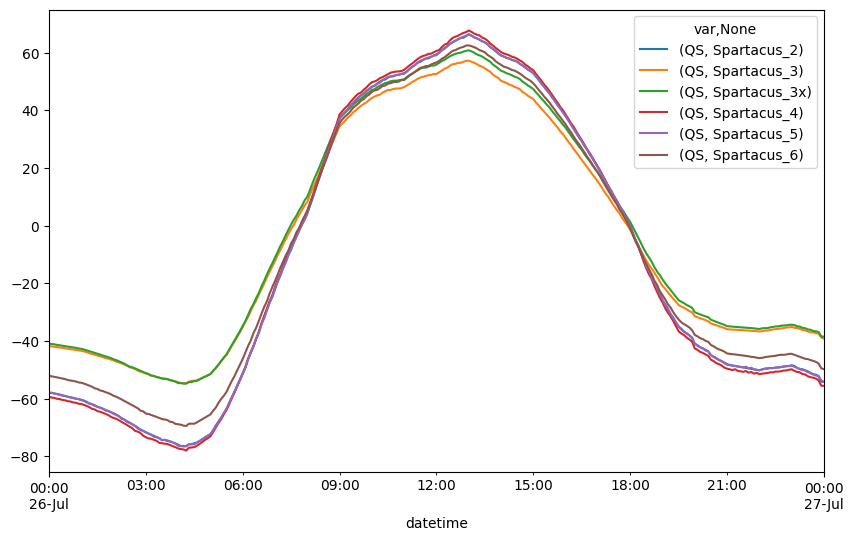

In [63]:
var = 'QS'

s = '2012-07-26 00:00'
e = '2012-07-27 00:00'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6))


var                          QH                                       \
                    Spartacus_2 Spartacus_3 Spartacus_3x Spartacus_4   
datetime                                                               
2012-07-21 00:00:00   48.244848   41.368751    41.300261   48.824320   
2012-07-21 00:05:00   47.836140   40.334748    40.474334   47.974919   
2012-07-21 00:10:00   47.430021   39.667076    40.429798   47.442564   
2012-07-21 00:15:00   46.579574   39.129244    39.601366   46.980728   
2012-07-21 00:20:00   46.048882   39.138637    39.443818   47.186675   
...                         ...         ...          ...         ...   
2012-07-30 23:35:00   25.107644   20.655376    20.788699   26.029114   
2012-07-30 23:40:00   24.944164   20.439214    20.647471   26.475660   
2012-07-30 23:45:00   25.444470   20.227802    20.439749   25.802624   
2012-07-30 23:50:00   24.770945   19.972494    20.237183   25.549040   
2012-07-30 23:55:00   25.630763   20.370832    20.585394   26.520422   

var                                          
                    Spartacus_5 Spartacus_6  
datetime                                     
2012-07-21 00:00:00   48.921357   46.039358  
2012-07-21 00:05:00   47.870872   45.094481  
2012-07-21 00:10:00   47.220059   44.522853  
2012-07-21 00:15:00   47.292482   44.040396  
2012-07-21 00:20:00   46.887041   44.184896  
...                         ...         ...  
2012-07-30 23:35:00   25.567789   23.936564  
2012-07-30 23:40:00   25.324973   23.696281  
2012-07-30 23:45:00   25.131991   23.493775  
2012-07-30 23:50:00   25.616121   23.307901  
2012-07-30 23:55:00   26.110252   24.297453  

[2880 rows x 6 columns]

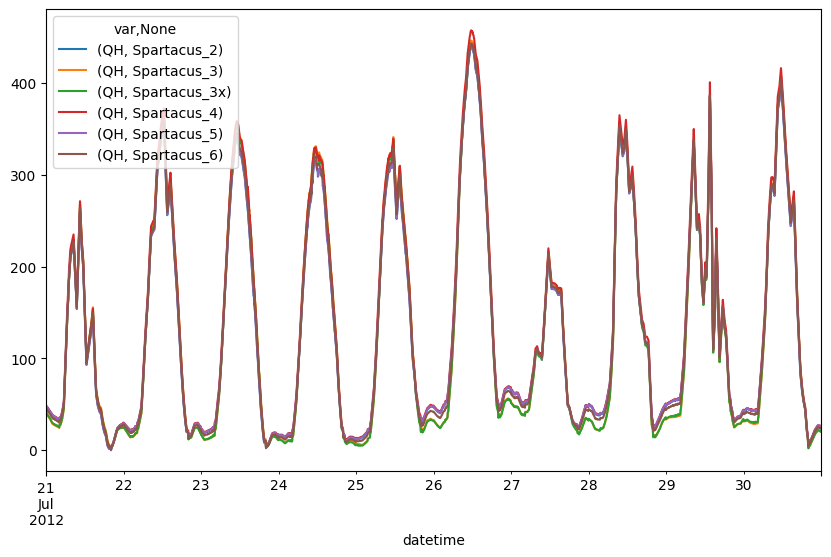

In [61]:
var = 'QE'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
df_merge.loc[s:e,[var]]

# Spartacus_2           Sampledata Spartacus, standard values in GridLayout
# Spartacus_3           Sampledata Spartacus Thicker first layer wall all three layers. 1.2 instad of .2
# Spartacus_3x          Sampledata Spartacus Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
# Spartacus_4           Sampledata Spartacus wall albedo lowered .25 instad of .5
# Spartacus_5           Sampledata Spartacus wall emissivity lower .9 instead of .95
# Spartacus_6           Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2

var                          QH                                       \
                    Spartacus_2 Spartacus_3 Spartacus_3x Spartacus_4   
datetime                                                               
2012-07-24 11:00:00  313.377099  328.884572   319.814909  328.853506   
2012-07-24 11:05:00  313.558028  329.264383   325.983803  328.543974   
2012-07-24 11:10:00  313.755408  322.897624   326.325617  328.742083   
2012-07-24 11:15:00  313.924385  330.190568   327.031003  328.936743   
2012-07-24 11:20:00  314.485070  330.517134   327.378111  329.512079   
2012-07-24 11:25:00  314.649713  330.864293   327.699320  329.698224   
2012-07-24 11:30:00  314.360585  331.187495   328.008234  329.858347   

var                                          
                    Spartacus_5 Spartacus_6  
datetime                                     
2012-07-24 11:00:00  314.383909  318.763932  
2012-07-24 11:05:00  313.990349  318.914216  
2012-07-24 11:10:00  314.576976  318.755767  
2012-07-24 11:15:00  314.349038  319.368876  
2012-07-24 11:20:00  314.505864  319.187416  
2012-07-24 11:25:00  314.634427  319.798533  
2012-07-24 11:30:00  315.193229  319.604505

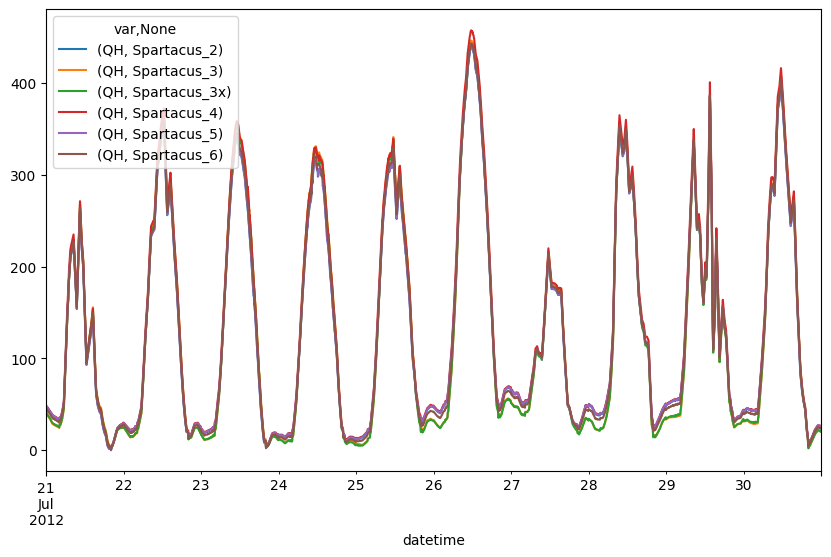

In [36]:
var = 'QH'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
df_merge.loc['2012-07-24 11:00': '2012-07-24 11:30',[var]]

# Spartacus_2           Sampledata Spartacus, standard values in GridLayout
# Spartacus_3           Sampledata Spartacus Thicker first layer wall all three layers. 1.2 instad of .2
# Spartacus_3x          Sampledata Spartacus Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
# Spartacus_4           Sampledata Spartacus wall albedo lowered .25 instad of .5
# Spartacus_5           Sampledata Spartacus wall emissivity lower .9 instead of .95
# Spartacus_6           Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2

var                          AE                                       \
                    Spartacus_2 Spartacus_3 Spartacus_3x Spartacus_4   
datetime                                                               
2012-07-24 11:00:00  441.657757  458.434412   456.387607  456.617262   
2012-07-24 11:05:00  442.684073  459.690617   456.101062  457.095279   
2012-07-24 11:10:00  443.728356  461.296249   457.308252  458.130655   
2012-07-24 11:15:00  444.732718  462.169897   458.933278  459.157395   
2012-07-24 11:20:00  446.186939  463.348260   460.140357  460.616977   
2012-07-24 11:25:00  447.179224  464.545849   461.310455  461.624675   
2012-07-24 11:30:00  447.633713  465.708848   462.460823  462.594541   

var                                          
                    Spartacus_5 Spartacus_6  
datetime                                     
2012-07-24 11:00:00  442.710017  447.524230  
2012-07-24 11:05:00  443.094999  448.542839  
2012-07-24 11:10:00  444.588483  449.172517  
2012-07-24 11:15:00  445.132815  450.690937  
2012-07-24 11:20:00  446.117491  451.282665  
2012-07-24 11:25:00  447.062087  452.791414  
2012-07-24 11:30:00  448.506643  453.359755

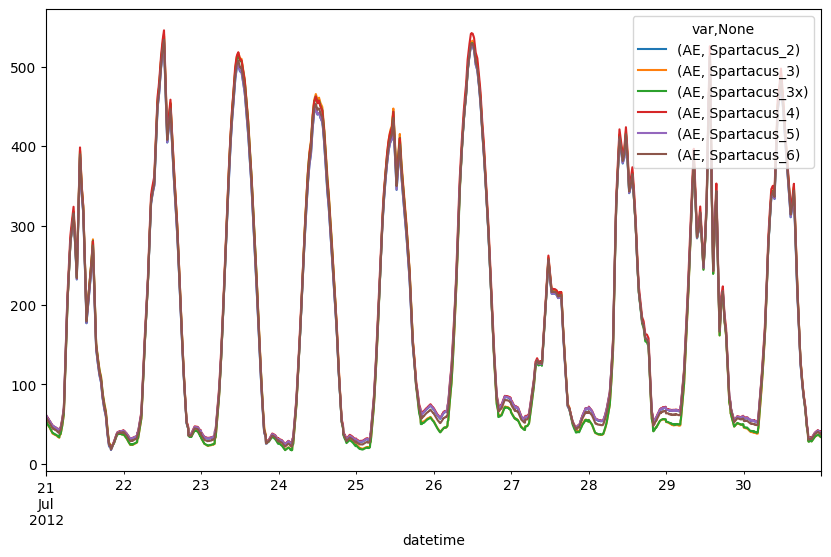

In [37]:
var = 'AE'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
df_merge.loc['2012-07-24 11:00': '2012-07-24 11:30',[var]]

# Spartacus_2           Sampledata Spartacus, standard values in GridLayout
# Spartacus_3           Sampledata Spartacus Thicker first layer wall all three layers. 1.2 instad of .2
# Spartacus_3x          Sampledata Spartacus Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
# Spartacus_4           Sampledata Spartacus wall albedo lowered .25 instad of .5
# Spartacus_5           Sampledata Spartacus wall emissivity lower .9 instead of .95
# Spartacus_6           Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2

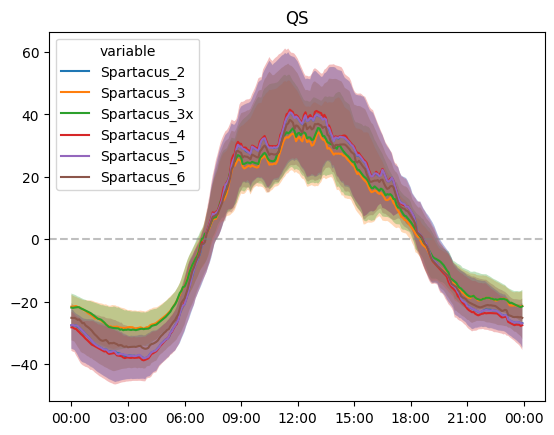

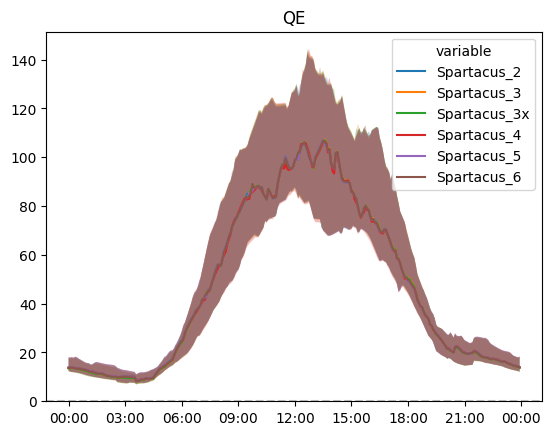

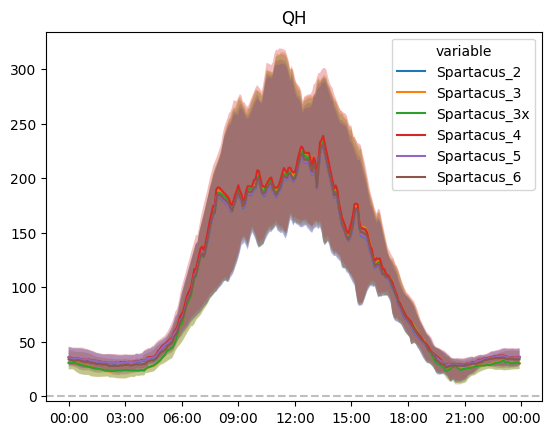

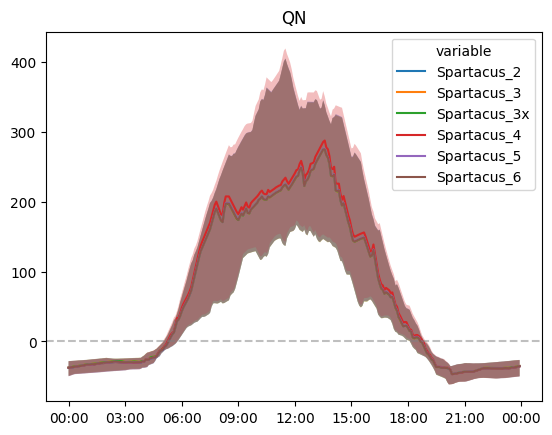

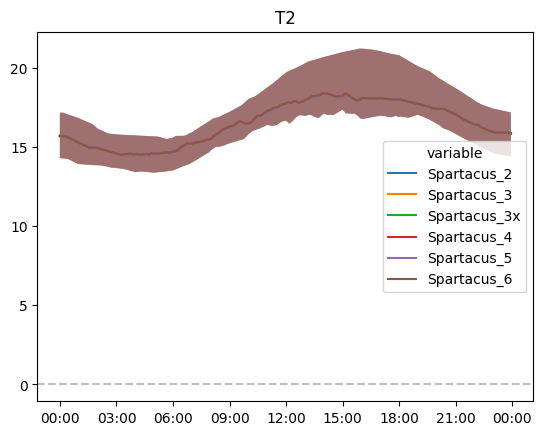

In [42]:
for var in ['QS','QE','QH', 'QN', 'T2']:
    fig,ax=sp.util.plot_day_clm(df_merge.loc['2012 7',var])
    _=ax.set_title(var)
    ax.axhline(0,0, linestyle = '--', color = 'grey', alpha = 0.5)



## No differences from Changing Wall thickness or reducing thermal conductivity of layer 1. 

## Changes in albedo highest difference (right now)

In [ ]:
t_rc = in_folder + '2021a/RunControl.nml'       # Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2

df_state_init_t = sp.init_supy(t_rc)
grid = df_state_init_t.index[0]
df_forcing = sp.load_forcing_grid(t_rc, grid)

2023-08-29 13:42:31,254 - SuPy - INFO - All cache cleared.
2023-08-29 13:42:32,128 - SuPy - WARNING - multiple years are set for grids: Int64Index([1], dtype='int64', name='Grid'); SuPy will proceed with records of the first year of each grid
2023-08-29 13:42:32,598 - SuPy - INFO - All cache cleared.
2023-08-29 13:42:33,188 - SuPy - WARNING - multiple years are set for grids: Int64Index([1], dtype='int64', name='Grid'); SuPy will proceed with records of the first year of each grid


In [ ]:
df_output_t, df_state_final_t = sp.run_supy(df_forcing, df_state_init_t)

2023-08-29 13:42:35,465 - SuPy - INFO - ====================
2023-08-29 13:42:35,466 - SuPy - INFO - Simulation period:
2023-08-29 13:42:35,467 - SuPy - INFO -   Start: 2005-01-01 00:05:00
2023-08-29 13:42:35,468 - SuPy - INFO -   End: 2005-01-06 00:00:00
2023-08-29 13:42:35,469 - SuPy - INFO - 
2023-08-29 13:42:35,470 - SuPy - INFO - No. of grids: 1
2023-08-29 13:42:35,471 - SuPy - INFO - SuPy is running in serial mode
2023-08-29 13:43:08,411 - SuPy - INFO - Execution time: 32.9 s
2023-08-29 13:43:08,412 - SuPy - INFO - ====================



# Kville

In [3]:
kv_rc = in_folder + 'kville/RunControl.nml'        
kvt_rc = in_folder + 'kville_t/RunControl.nml'        

df_state_init_kv = sp.init_supy(kv_rc)
df_state_init_kvt = sp.init_supy(kvt_rc)


2023-08-31 15:52:30,361 - SuPy - INFO - All cache cleared.
2023-08-31 15:52:31,416 - SuPy - INFO - All cache cleared.


In [28]:
# Metdata 
grid = df_state_init_kv.index[1]
df_forcing = sp.load_forcing_grid(kv_rc, grid)

2023-08-31 15:58:28,036 - SuPy - INFO - All cache cleared.


In [29]:
df_forcing = df_forcing.loc['2018-05-28':'2018-06-05']

df_forcing

,iy,id,it,imin,qn,qh,qe,qs,qf,U,...,snow,ldown,fcld,Wuh,xsmd,lai,kdiff,kdir,wdir,isec
2018-05-28 00:00:00,2018,148,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,1.600000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:05:00,2018,148,0,5,-999.0,-999.0,-999.0,-999.0,-999.0,1.558333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:10:00,2018,148,0,10,-999.0,-999.0,-999.0,-999.0,-999.0,1.516667,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:15:00,2018,148,0,15,-999.0,-999.0,-999.0,-999.0,-999.0,1.475000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:20:00,2018,148,0,20,-999.0,-999.0,-999.0,-999.0,-999.0,1.433333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-05 23:35:00,2018,156,23,35,-999.0,-999.0,-999.0,-999.0,-999.0,1.108333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:40:00,2018,156,23,40,-999.0,-999.0,-999.0,-999.0,-999.0,1.066667,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:45:00,2018,156,23,45,-999.0,-999.0,-999.0,-999.0,-999.0,1.025000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:50:00,2018,156,23,50,-999.0,-999.0,-999.0,-999.0,-999.0,0.983333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0


In [30]:
df_output_kv, df_state_final_kv = sp.run_supy(df_forcing, df_state_init_kv)
df_output_kvt, df_state_final_kvt = sp.run_supy(df_forcing, df_state_init_kvt)

2023-08-31 15:58:41,529 - SuPy - INFO - ====================
2023-08-31 15:58:41,530 - SuPy - INFO - Simulation period:
2023-08-31 15:58:41,531 - SuPy - INFO -   Start: 2018-05-28 00:00:00
2023-08-31 15:58:41,531 - SuPy - INFO -   End: 2018-06-05 23:55:00
2023-08-31 15:58:41,533 - SuPy - INFO - 
2023-08-31 15:58:41,533 - SuPy - INFO - No. of grids: 15
2023-08-31 15:58:41,535 - SuPy - INFO - SuPy is running in serial mode


# Save

In [43]:
o_list = [df_output_s2, df_output_s3, df_output_s3x,df_output_s4, df_output_s5, df_output_s6, ]
st_list = [df_state_final_s2, df_state_final_s3, df_state_final_s3x,df_state_final_s4, df_state_final_s5, df_state_final_s6, ]
rc_list = [s2_rc,s3_rc, s3x_rc, s4_rc, s5_rc, s6_rc]

for output, state_final, runcontrol in zip(o_list, st_list, rc_list):
    sp.save_supy(output, state_final, path_runcontrol=runcontrol)

# sp.save_supy(df_output_w, df_state_final_w, path_runcontrol=path_runcontrol_w)
# sp.save_supy(df_output_wu, df_state_final_wu, path_runcontrol=path_runcontrol_wu)



<Axes: xlabel='datetime'>

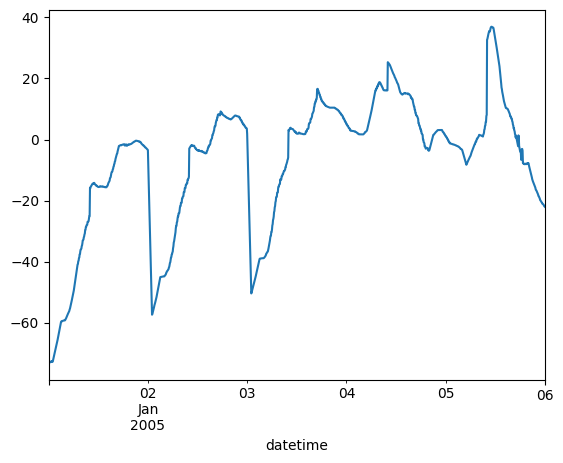

In [ ]:
df_output_t.loc[1].SUEWS.loc[:,'QS'].plot()